In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns
import xarray as xr
import xgcm
import pop_tools

In [2]:
ds = xr.open_dataset("/work/DXL/try/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0313-09.nc")
ds

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 1, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                (time) object 0313-10-01 00:00:00
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
    ULONG               (nlat, nlon) float64 ...
    ULAT                (nlat, nlon) float64 ...
    TLONG               (nlat, nlon) float64 ...
    TLAT                (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/87)
    time_bound          (time, d2) object ...
    dz                  (z_t) float32 ...
    dzw                 (z_w) float32 ...
    KMT                 (nlat, nlon) float64 ...
    KMU                 (nlat, nlon) float64 ...
    REGION_MASK         (nlat, nlon) float64 ...
    ...                  ...
    HMXL                (time, nlat, nlon) float32 ...
    XMXL                (time, nlat, nlon) float32 ...
    TMXL                (time, nlat, nlon) float32 ...
    HBLT                (time, nlat, nlon) float32 ...
    XBLT                (time, nlat, nlon) float32 ...
    TBLT                (time, nlat, nlon) float32 ...
Attributes:
    title:           B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-11-04 at 00:40:42.6
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    66676259
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0

In [3]:
data222=nc.Dataset("/work/DXL/try/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0313-09.nc")
TLONG222 = data222.variables['TLONG'][:480,:]
TLAT222 = data222.variables['TLAT'][:480,:]
TLONG222[TLONG222==-1] = np.nan
TLAT222[TLAT222==-1] = np.nan
ULONG222 = data222.variables['ULONG'][:480,:]
ULAT222 = data222.variables['ULAT'][:480,:]
ULONG222[ULONG222==-1] = np.nan
ULAT222[ULAT222==-1] = np.nan

UET = data222.variables['UET'][:480,:]
VNT = data222.variables['VNT'][:480,:]

In [4]:
UET.shape

(1, 62, 2400, 3600)

In [5]:
data222=xr.open_dataset("/work/DXL/try/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0313-09.nc")
VVEL = data222['VVEL'][0,:,:]
KMU= data222['KMU'][:480,:] ## k Index of Deepest Grid Cell on U Grid
HU= data222['HU'][:,:] ## water depth on U grid, cm
HT= data222['HT'][:,:] ## water depth on T grid, cm
SSH= data222['SSH'][:,:]
DXU= data222['DXU'][:,:] ## cm
DYT= data222['DYT'][:,:] ## cm

UVEL = data222['UVEL'][0,:,:]
tlat = data222['TLAT'][:,700]
tlon = data222['TLONG'][478,:]

#nlat = data222['nlat']
ulat = data222['ULAT'][:,700]
ulon = data222['ULONG'][478,:]

# ZZZ in m

In [6]:
ulat.shape

(2400,)

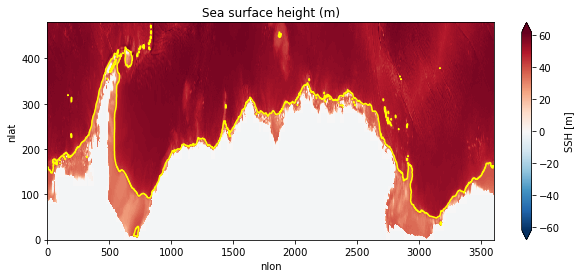

In [7]:
fig = plt.figure(figsize = (10, 4))
KMU.plot(extend='both', cbar_kwargs={'label': "SSH [m]"})
KMU.plot.contour(levels = [40],colors = 'yellow', linestyles = '-')
plt.title('Sea surface height (m)');

In [8]:
np.nanmax(KMU)

62.0

In [9]:
# Fill in land with zeros:
KMU = KMU.fillna(0)

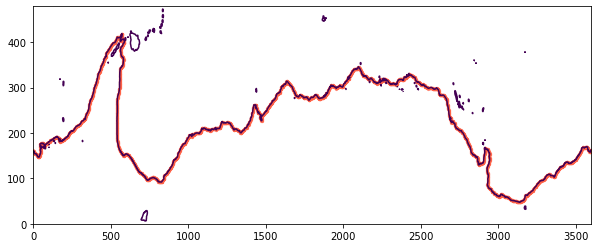

In [10]:
fig = plt.figure(figsize = (10, 4))
count = 0
x_contour = []
y_contour = []

# Create the contour:
sc = plt.contour(KMU, levels=[40])
for collection in sc.collections:
    for path in collection.get_paths():
        #print(path)
        count += 1
        #print(count)
        if count ==  1:
            # Write down the lat/lon indices
            for ii in range(np.size(path.vertices[:,0])):
                x_contour.append(int(np.round(path.vertices[ii][0])))
                y_contour.append(int(np.round(path.vertices[ii][1])))

plt.scatter(x_contour, y_contour, s=5, alpha=0.5, color='tomato');

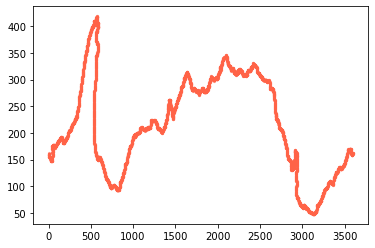

In [11]:
plt.scatter(x_contour, y_contour, s=5, alpha=0.5, color='tomato')

In [12]:
len(x_contour)

4692

In [13]:
len(y_contour)

4692

In [14]:
# Difference between two neighbouring indices
diff_x_contour = np.diff(x_contour)
diff_y_contour = np.diff(y_contour)

# Get a list with the indices of duplicates
diff_ind = []
for ii in range(len(diff_x_contour)):
    if (diff_x_contour[ii]==0) and (diff_y_contour[ii]==0):
        diff_ind.append(ii)

In [15]:
# Now remove the indices (start from the end so the indices don't shift)
for ii in range(len(diff_ind)):
    index = diff_ind[::-1][ii]
    del x_contour[index]
    del y_contour[index]

In [16]:
len(y_contour)

4410

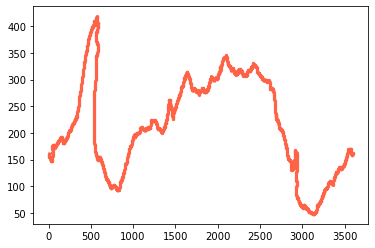

In [17]:
plt.scatter(x_contour, y_contour, s=5, alpha=0.5, color='tomato')

In [18]:
import os

file_name = 'lonlat'
outfile   = os.path.join(file_name+'.npz')

np.savez(outfile, lon_along_contour=x_contour, lat_along_contour=y_contour,num_points=4410 )

In [19]:
KMU_contour = np.zeros(len(x_contour))

for ii in range(len(KMU_contour)):
    KMU_contour[ii] = KMU[y_contour[ii], x_contour[ii]]

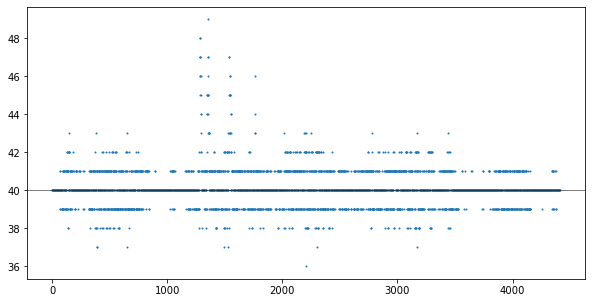

In [20]:
fig = plt.figure(figsize=(10, 5))

plt.plot(KMU_contour, 'o', markersize=1)
plt.axhline(40, color='k', linewidth=0.5);

In [21]:
len(KMU_contour)

4410

In [22]:
lat_along_contour = np.zeros((len(x_contour)))
lon_along_contour = np.zeros((len(x_contour)))

for ii in range(len(KMU_contour)):
    lon_along_contour[ii] = tlon[x_contour[ii]]
    lat_along_contour[ii] = tlat[y_contour[ii]]

In [23]:
len(lat_along_contour)

4410

In [24]:
lat_along_contour = np.append(lat_along_contour, lat_along_contour[0])
lon_along_contour = np.append(lon_along_contour, lon_along_contour[0])

In [25]:
lat_along_contour[0]

-71.62644744493164

In [26]:
import os

file_name = 'lonlat222'
outfile   = os.path.join(file_name+'.npz')

np.savez(outfile, lon_along_contour222=lon_along_contour, lat_along_contour222=lon_along_contour )

In [27]:
len(lat_along_contour)

4411

In [28]:
len(KMU_contour)

4410

In [29]:
# Number of grid points on the contour
num_points = len(lat_along_contour)

In [30]:
contour_mask_numbered = np.zeros_like(lon_along_contour)

for ii in range(num_points-1):
    lat1 = lat_along_contour[ii]
    lat2 = lat_along_contour[ii+1]
    lon1 = lon_along_contour[ii]
    lon2 = lon_along_contour[ii+1]
    contour_mask_numbered[ii] = ii

In [31]:
contour_mask = KMU*0

for ii in range(num_points-1):
    contour_mask[y_contour[ii], x_contour[ii]] = contour_mask_numbered[ii]+1

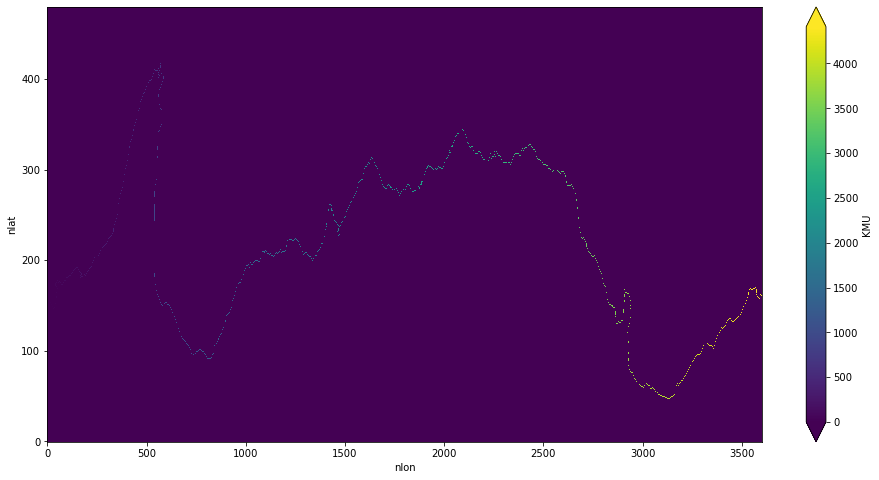

In [32]:
plt.figure(1, figsize=(16, 8))
contour_mask.plot(extend='both');

In [33]:
contour_mask

<xarray.DataArray 'KMU' (nlat: 480, nlon: 3600)>
array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Coordinates:
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon

In [34]:
mask_value = -1000
contour_mask_numbered = contour_mask

# fill in points to south of contour:
contour_masked_above = np.copy(contour_mask_numbered)
contour_masked_above[-1, 0] = mask_value



In [35]:
contour_mask.TLONG.shape

(480, 3600)

In [36]:
# from top left:
for ii in range(len(TLAT222[1])-1):
    for jj in range(len(TLONG222))[::-1][:-1]:
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj-1, ii] == 0:
                contour_masked_above[jj-1, ii] = mask_value
            if contour_masked_above[jj, ii+1] == 0:
                contour_masked_above[jj, ii+1] = mask_value

#from top right:
for ii in range(len(TLAT222[1]))[::-1][:-1]:
    for jj in range(len(TLONG222))[::-1][:-1]:
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj-1, ii] == 0:
                contour_masked_above[jj-1, ii] = mask_value
            if contour_masked_above[jj, ii-1] == 0:
                contour_masked_above[jj, ii-1] = mask_value

# from bottom right:
for ii in range(len(TLAT222[1]))[::-1][:-1]:
    for jj in range(len(TLONG222)-1):
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj+1, ii] == 0:
                contour_masked_above[jj+1, ii] = mask_value
            if contour_masked_above[jj, ii-1] == 0:
                contour_masked_above[jj, ii-1] = mask_value

#from bottom left:
for ii in range(len(TLAT222[1])-1):
    for jj in range(len(TLONG222)-1):
        if contour_masked_above[jj, ii] == mask_value:
            if contour_masked_above[jj+1, ii] == 0:
                contour_masked_above[jj+1, ii] = mask_value
            if contour_masked_above[jj, ii+1] == 0:
                contour_masked_above[jj, ii+1] = mask_value

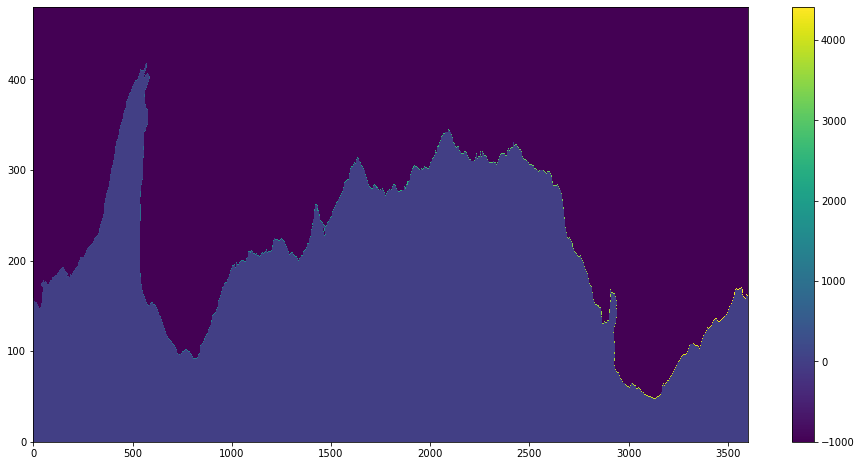

In [37]:
plt.figure(1, figsize=(16, 8))

plt.pcolormesh(contour_masked_above)
plt.colorbar();

In [38]:
mask_x_transport = np.zeros_like(contour_mask_numbered)
mask_y_transport = np.zeros_like(contour_mask_numbered)

mask_y_transport_numbered = np.zeros_like(contour_mask_numbered)
mask_x_transport_numbered = np.zeros_like(contour_mask_numbered)

# make halos:
shape = contour_masked_above.shape
contour_masked_above_halo = np.zeros((shape[0], shape[1]+2))
contour_masked_above_halo[:, 0] = contour_masked_above[:, -1]
contour_masked_above_halo[:, 1:-1] = contour_masked_above
contour_masked_above_halo[:, -1] = contour_masked_above[:, 0]

new_number_count = 1
for mask_loc in range(1, int(np.max(contour_mask_numbered))+1):
    #if mask_loc%100 == 0:
    #    print('mask for x/y transport at point '+str(mask_loc))
    index_i = np.where(contour_mask_numbered==mask_loc)[1]
    index_j = np.where(contour_mask_numbered==mask_loc)[0]
    # if point above is towards Antarctica and point below is away from Antarctica:
    # take transport grid point to north of t grid:
    if (contour_masked_above[index_j+1, index_i]==0) and (contour_masked_above[index_j-1, index_i]!=0):
        mask_y_transport[index_j, index_i] = -1
        # important to do
        mask_y_transport_numbered[index_j, index_i] = new_number_count
        new_number_count += 1
    # if point below is towards Antarctica and point above is away from Antarctica:
    # take transport grid point to south of t grid:
    elif (contour_masked_above[index_j-1, index_i]==0) and (contour_masked_above[index_j+1, index_i]!=0):
        mask_y_transport[index_j-1, index_i] = 1
        mask_y_transport_numbered[index_j-1, index_i] = new_number_count
        new_number_count += 1
        # if point below and point above are BOTH towards Antarctica:
    # take transport grid point to south of t grid:
    elif (contour_masked_above[index_j-1, index_i]==0) and (contour_masked_above[index_j+1, index_i]==0):
        mask_y_transport[index_j-1, index_i] = 1
        mask_y_transport[index_j, index_i] = -1
        mask_y_transport_numbered[index_j-1, index_i] = new_number_count
        mask_y_transport_numbered[index_j, index_i] = new_number_count+1
        new_number_count += 2
    # if point to right is towards Antarctica and point to left is away from Antarctica:
    # zonal indices increased by 1 due to halos
    # take transport grid point on right of t grid:
    if (contour_masked_above_halo[index_j, index_i+2]==0) and (contour_masked_above_halo[index_j, index_i]!=0):
        mask_x_transport[index_j, index_i] = -1
        mask_x_transport_numbered[index_j, index_i] = new_number_count
        new_number_count += 1
    # if point to left is towards Antarctica and point to right is away from Antarctica:
    # take transport grid point on left of t grid:
    elif (contour_masked_above_halo[index_j, index_i]==0) and (contour_masked_above_halo[index_j, index_i+2]!=0):
        mask_x_transport[index_j, index_i-1] = 1
        mask_x_transport_numbered[index_j, index_i-1] = new_number_count
        new_number_count += 1
    # if point to left and right BOTH toward Antarctica
    elif (contour_masked_above_halo[index_j, index_i]==0) and (contour_masked_above_halo[index_j, index_i+2]==0):
        mask_x_transport[index_j, index_i-1] = 1
        mask_x_transport[index_j, index_i] = -1
        mask_x_transport_numbered[index_j, index_i-1] = new_number_count
        mask_x_transport_numbered[index_j, index_i] = new_number_count+1
        new_number_count += 2

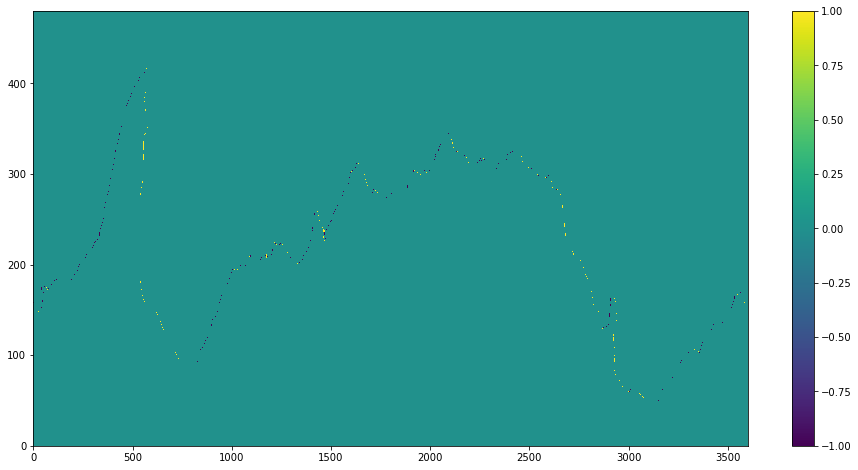

In [39]:
plt.figure(1, figsize=(16, 8))

plt.pcolormesh(mask_x_transport)
plt.colorbar();

In [40]:
# Convert contour masks to data arrays, so we can multiply them later.
# We need to ensure the lat lon coordinates correspond to the actual data location:
#       The y masks are used for ty_trans, so like vhrho this should have dimensions (yu_ocean, xt_ocean).
#       The x masks are used for tx_trans, so like uhrho this should have dimensions (yt_ocean, xu_ocean).
#       However the actual name will always be simply y_ocean/x_ocean irrespective of the variable
#       to make concatenation of transports in both direction and sorting possible.

mask_x_transport = xr.DataArray(mask_x_transport, coords = [tlat[:480], ulon], dims = ['y_ocean','x_ocean'])
mask_y_transport = xr.DataArray(mask_y_transport, coords = [ulat[:480],tlon], dims = ['y_ocean','x_ocean'])
mask_x_transport_numbered = xr.DataArray(mask_x_transport_numbered, coords = [tlat[:480], ulon], dims = ['y_ocean','x_ocean'])
mask_y_transport_numbered = xr.DataArray(mask_y_transport_numbered, coords = [ulat[:480], tlon], dims = ['y_ocean','x_ocean'])

In [41]:
tlon[:]

<xarray.DataArray 'TLONG' (nlon: 3600)>
array([250.05, 250.15, 250.25, ..., 249.75, 249.85, 249.95])
Coordinates:
    ULONG    (nlon) float64 ...
    ULAT     (nlon) float64 ...
    TLONG    (nlon) float64 ...
    TLAT     (nlon) float64 ...
Dimensions without coordinates: nlon
Attributes:
    long_name:  array of t-grid longitudes
    units:      degrees_east

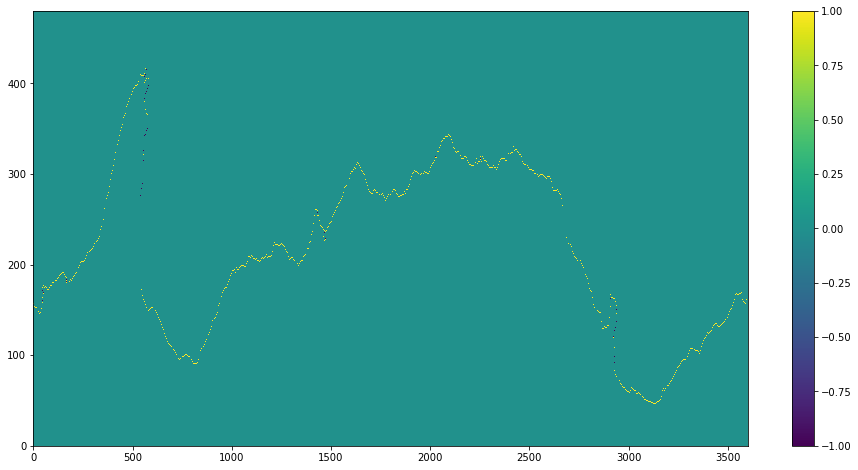

In [42]:
plt.figure(1, figsize=(16, 8))
plt.pcolormesh(mask_y_transport)
plt.colorbar();
#mask_x_transport.plot;


In [43]:
np.nanmax(mask_x_transport)

1.0

In [44]:
# Create the contour order data-array. Note that in this procedure the x-grid counts have x-grid
#   dimensions and the y-grid counts have y-grid dimensions, but these are implicit, the dimension
#   *names* are kept general across the counts, the generic y_ocean, x_ocean, so that concatening works
#   but we dont double up with numerous counts for one lat/lon point.

# stack contour data into 1d:
mask_x_numbered_1d = mask_x_transport_numbered.stack(contour_index = ['y_ocean', 'x_ocean'])
mask_x_numbered_1d = mask_x_numbered_1d.where(mask_x_numbered_1d > 0, drop = True)

mask_y_numbered_1d = mask_y_transport_numbered.stack(contour_index = ['y_ocean', 'x_ocean'])
mask_y_numbered_1d = mask_y_numbered_1d.where(mask_y_numbered_1d > 0, drop = True)

contour_ordering = xr.concat((mask_x_numbered_1d, mask_y_numbered_1d), dim = 'contour_index')
contour_ordering = contour_ordering.sortby(contour_ordering)
contour_index_array = np.arange(1, len(contour_ordering)+1)

In [45]:
contour_ordering

<xarray.DataArray (contour_index: 6002)>
array([1.000e+00, 2.000e+00, 3.000e+00, ..., 6.000e+03, 6.001e+03,
       6.002e+03])
Coordinates:
  * contour_index  (contour_index) MultiIndex
  - y_ocean        (contour_index) float64 -71.65 -71.69 ... -71.65 -71.63
  - x_ocean        (contour_index) float64 250.1 250.2 -109.9 ... 249.9 -110.1

In [46]:
    # select latitude range:
    tx_trans = data222['UET'][0,:,:480,:]
    ty_trans = data222['VNT'][0,:,:480,:]
    
    ty_trans = ty_trans.rename({'nlat': 'y_ocean', 'nlon': 'x_ocean'})
    tx_trans = tx_trans.rename({'nlat': 'y_ocean', 'nlon': 'x_ocean'})

In [47]:
ty_trans

<xarray.DataArray 'VNT' (z_t: 62, y_ocean: 480, x_ocean: 3600)>
[107136000 values with dtype=float32]
Coordinates:
    time     object 0313-10-01 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
    ULONG    (y_ocean, x_ocean) float64 ...
    ULAT     (y_ocean, x_ocean) float64 ...
    TLONG    (y_ocean, x_ocean) float64 ...
    TLAT     (y_ocean, x_ocean) float64 ...
Dimensions without coordinates: y_ocean, x_ocean
Attributes:
    long_name:     Flux of Heat in grid-y direction
    units:         degC/s
    grid_loc:      3121
    cell_methods:  time: mean

In [48]:
mask_y_transport

<xarray.DataArray (y_ocean: 480, x_ocean: 3600)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * y_ocean  (y_ocean) float64 -78.45 -78.41 -78.37 ... -57.39 -57.34 -57.28
  * x_ocean  (x_ocean) float64 250.1 250.2 250.2 250.3 ... 249.8 249.8 249.9

In [49]:
ρ0 = 1035 # kg/m^3

ty_trans = ty_trans * mask_y_transport / ρ0 # convert to Sv
tx_trans = tx_trans * mask_x_transport / ρ0 # convert to Sv

In [50]:
ty_trans

<xarray.DataArray (z_t: 62, y_ocean: 480, x_ocean: 3600)>
array([[[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0.,  0., ..., -0., -0., -0.],
        [-0.,  0.,  0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0.,  0., ..., -0., -0., -0.],
        [-0., -0.,  0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
...
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])
Coordinates:
  * y_ocean  (y_ocean) float64 -78.45 -78.41 -78.37 ... -57.39 -57.34 -57.28
  * x_ocean  (x_ocean) float64 250.1 250.2 250.2 250.3 ... 249.8 249.8 249.9
    time     object 0313-10-01 00:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
    ULONG    (y_ocean, x_ocean) float64 ...
    ULAT     (y_ocean, x_ocean) float64 ...
    TLONG    (y_ocean, x_ocean) float64 ...
    TLAT     (y_ocean, x_ocean) float64 ...

In [51]:
## We could also loop in time if we didn't want the time average. Initialise a data array and fill in data by looping in time.

# stack transports into 1d and drop any points not on contour:
x_transport_1d = tx_trans.stack(contour_index = ['y_ocean', 'x_ocean'])
x_transport_1d = x_transport_1d.where(mask_x_numbered_1d>0, drop = True)
y_transport_1d = ty_trans.stack(contour_index = ['y_ocean', 'x_ocean'])
y_transport_1d = y_transport_1d.where(mask_y_numbered_1d>0, drop = True)

In [52]:
x_transport_1d

<xarray.DataArray (z_t: 62, contour_index: 2080)>
array([[ 6.79990823e-08, -4.64285674e-08,  5.18598976e-08, ...,
         7.37260043e-09, -1.70445564e-08,  1.84458144e-08],
       [ 6.24301838e-08, -3.91990037e-08,  4.57897630e-08, ...,
         9.92329107e-09, -1.97174444e-08,  2.13688671e-08],
       [ 5.67736997e-08, -3.54566905e-08,  4.21021143e-08, ...,
         1.07399514e-08, -2.06102536e-08,  2.23443006e-08],
       ...,
       [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00]])
Coordinates:
  * contour_index  (contour_index) MultiIndex
  - y_ocean        (contour_index) float64 -76.44 -76.44 -76.4 ... -60.46 -60.46
  - x_ocean        (contour_index) float64 -157.4 -155.7 -158.2 ... -53.0 -52.8
    time           object 0313-10-01 00:00:00
  * z_t            (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
    ULONG          (contour_index) float64 -157.4 -155.7 -158.2 ... -53.0 -52.8
    ULAT           (contour_index) float64 -76.42 -76.42 ... -60.44 -60.44
    TLONG          (contour_index) float64 202.6 204.2 201.8 ... 306.9 307.1
    TLAT           (contour_index) float64 -76.44 -76.44 -76.4 ... -60.46 -60.46

In [53]:
# combine all points on contour:
vol_trans_across_contour = xr.concat((x_transport_1d, y_transport_1d), dim = 'contour_index')
vol_trans_across_contour
vol_trans_across_contour = vol_trans_across_contour.sortby(contour_ordering)
vol_trans_across_contour.coords['contour_index'] = contour_index_array

In [54]:
vol_trans_across_contour

<xarray.DataArray (z_t: 62, contour_index: 6002)>
array([[ 6.38674201e-09,  6.53194745e-09, -1.17076160e-08, ...,
         6.28418308e-09,  6.27036974e-09, -1.25333880e-08],
       [ 4.01769768e-09,  4.24288549e-09, -1.26686267e-08, ...,
         3.88474713e-09,  3.83772845e-09, -1.32612658e-08],
       [ 2.26337357e-09,  2.59149004e-09, -1.19270195e-08, ...,
         2.41557641e-09,  2.12049481e-09, -1.20566484e-08],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])
Coordinates:
  * contour_index  (contour_index) int64 1 2 3 4 5 ... 5998 5999 6000 6001 6002
    time           object 0313-10-01 00:00:00
  * z_t            (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
    ULONG          (contour_index) float64 -109.9 -109.8 ... -110.0 -110.1
    ULAT           (contour_index) float64 -71.65 -71.69 ... -71.65 -71.61
    TLONG          (contour_index) float64 250.0 250.2 250.0 ... 249.9 249.8
    TLAT           (contour_index) float64 -71.67 -71.71 ... -71.67 -71.63

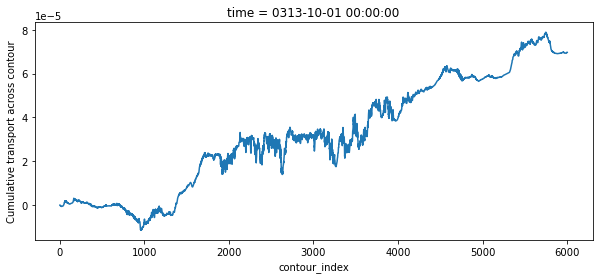

In [55]:
fig, ax = plt.subplots(figsize = (10, 4))

vol_trans_across_contour.sum('z_t').cumsum('contour_index').plot()
ax.set_ylabel('Cumulative transport across contour');